In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

### Linear Regression

In [10]:
def LRFunction(X_train, y_train, X_test, y_test, cathepsin):
    # Initialize and train the model
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on the test set (continuous outputs)
    y_pred_linear = linear_regressor.predict(X_test)

    # Evaluate the model using regression metrics
    mse_linear = mean_squared_error(np.argmax(y_test, axis=1), y_pred_linear)
    r2_linear = r2_score(np.argmax(y_test, axis=1), y_pred_linear)

    print("Linear Regression MSE:", mse_linear)
    print("Linear Regression R²:", r2_linear)

    # If you want to calculate accuracy (convert continuous outputs to discrete classes)
    y_pred_classes = np.round(y_pred_linear).astype(int)  # Round to the nearest class
    y_pred_classes = np.clip(y_pred_classes, 0, 3)  # Ensure predictions are within [0, 3]

    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    print(f"Accuracy of the model (using rounded predictions) for {cathepsin}: {accuracy * 100:.2f}%")


### Decision Tree Regressor

In [11]:

def DecisionFunction(X_train, y_train, X_test, y_test, cathepsin):
    # Initialize and train the model
    decision_tree = DecisionTreeRegressor(random_state=43)
    decision_tree.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on the test set
    y_pred_tree = decision_tree.predict(X_test)

    # Evaluate the model using regression metrics
    mse_tree = mean_squared_error(np.argmax(y_test, axis=1), y_pred_tree)
    r2_tree = r2_score(np.argmax(y_test, axis=1), y_pred_tree)

    print("Decision Tree MSE:", mse_tree)
    print("Decision Tree R²:", r2_tree)

    # Convert continuous predictions to discrete class labels
    y_pred_classes_tree = np.round(y_pred_tree).astype(int)  # Round to nearest integer
    y_pred_classes_tree = np.clip(y_pred_classes_tree, 0, 3)  # Clip predictions to valid range [0, 3]

    # Calculate accuracy
    accuracy_tree = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_tree)
    print(f"Decision Tree Accuracy (using rounded predictions) for {cathepsin}: {accuracy_tree * 100:.2f}%")


### Random Forest Regressor

In [12]:
def RandomForestFunction(X_train, y_train, X_test, y_test, cathepsin):
    # Initialize and train the Random Forest model
    random_forest = RandomForestRegressor(n_estimators=10, random_state=42)
    random_forest.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on the test set
    y_pred_rf = random_forest.predict(X_test)

    # Evaluate the model using regression metrics
    mse_rf = mean_squared_error(np.argmax(y_test, axis=1), y_pred_rf)
    r2_rf = r2_score(np.argmax(y_test, axis=1), y_pred_rf)

    print("Random Forest MSE:", mse_rf)
    print("Random Forest R²:", r2_rf)

    # Convert continuous predictions to discrete class labels
    y_pred_classes_rf = np.round(y_pred_rf).astype(int)  # Round predictions to nearest integer
    y_pred_classes_rf = np.clip(y_pred_classes_rf, 0, 3)  # Clip predictions to valid range [0, 3]

    # Calculate accuracy (optional classification-like evaluation)
    accuracy_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_rf)
    print(f"Random Forest Accuracy (using rounded predictions) for {cathepsin}: {accuracy_rf * 100:.2f}%")


### Gradient Boosting Regressor

In [13]:
def GradientBoostingFunction(X_train, y_train, X_test, y_test, cathepsin):

    # Initialize and train the Gradient Boosting Regressor
    gboost = GradientBoostingRegressor(random_state=42)
    gboost.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on the test set
    y_pred_gboost = gboost.predict(X_test)

    # Evaluate the model using regression metrics
    mse_gboost = mean_squared_error(np.argmax(y_test, axis=1), y_pred_gboost)
    r2_gboost = r2_score(np.argmax(y_test, axis=1), y_pred_gboost)

    print("Gradient Boosting MSE:", mse_gboost)
    print("Gradient Boosting R²:", r2_gboost)

    # Convert continuous predictions to discrete class labels
    y_pred_classes_gboost = np.round(y_pred_gboost).astype(int)  # Round predictions to nearest integer
    y_pred_classes_gboost = np.clip(y_pred_classes_gboost, 0, 3)  # Clip predictions to valid range [0, 3]

    # Calculate accuracy (optional classification-like evaluation)
    accuracy_gboost = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_gboost)
    print(f"Gradient Boosting Accuracy (using rounded predictions) for {cathepsin}: {accuracy_gboost * 100:.2f}%")


### k-Nearest Neighbors (kNN) Regressor

In [14]:
def KNNFunction(X_train, y_train, X_test, y_test, cathepsin):   
    # Initialize and train the k-Nearest Neighbors Regressor
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on the test set
    y_pred_knn = knn.predict(X_test)

    # Evaluate the model using regression metrics
    mse_knn = mean_squared_error(np.argmax(y_test, axis=1), y_pred_knn)
    r2_knn = r2_score(np.argmax(y_test, axis=1), y_pred_knn)

    print("kNN Regression MSE:", mse_knn)
    print("kNN Regression R²:", r2_knn)

    # Convert continuous predictions to discrete class labels
    y_pred_classes_knn = np.round(y_pred_knn).astype(int)  # Round predictions to nearest integer
    y_pred_classes_knn = np.clip(y_pred_classes_knn, 0, 3)  # Clip predictions to valid range [0, 3]

    # Calculate accuracy (optional classification-like evaluation)
    accuracy_knn = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_knn)
    print(f"kNN Regression Accuracy (using rounded predictions) for {cathepsin}: {accuracy_knn * 100:.2f}%")


### Support Vector Regression (SVR)

In [15]:
def SVRFunction(X_train, y_train, X_test, y_test, cathepsin):
    # Initialize and train the Support Vector Regressor
    svr = SVR(kernel='rbf')
    svr.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on the test set
    y_pred_svr = svr.predict(X_test)

    # Evaluate the model using regression metrics
    mse_svr = mean_squared_error(np.argmax(y_test, axis=1), y_pred_svr)
    r2_svr = r2_score(np.argmax(y_test, axis=1), y_pred_svr)

    print("SVR MSE:", mse_svr)
    print("SVR R²:", r2_svr)

    # Convert continuous predictions to discrete class labels
    y_pred_classes_svr = np.round(y_pred_svr).astype(int)  # Round predictions to nearest integer
    y_pred_classes_svr = np.clip(y_pred_classes_svr, 0, 3)  # Clip predictions to valid range [0, 3]

    # Calculate accuracy (optional classification-like evaluation)
    accuracy_svr = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_svr)
    print(f"SVR Accuracy (using rounded predictions) for {cathepsin}: {accuracy_svr * 100:.2f}%")


### Multilayer Perceptron (MLP) Regression

In [16]:
def MLPFunction(X_train, y_train, X_test, y_test, cathepsin):
    # Initialize and train the Multi-layer Perceptron Regressor
    mlp = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
    mlp.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on the test set
    y_pred_mlp = mlp.predict(X_test)

    # Evaluate the model using regression metrics
    mse_mlp = mean_squared_error(np.argmax(y_test, axis=1), y_pred_mlp)
    r2_mlp = r2_score(np.argmax(y_test, axis=1), y_pred_mlp)

    print("MLP Regression MSE:", mse_mlp)
    print("MLP Regression R²:", r2_mlp)

    # Convert continuous predictions to discrete class labels
    y_pred_classes_mlp = np.round(y_pred_mlp).astype(int)  # Round predictions to nearest integer
    y_pred_classes_mlp = np.clip(y_pred_classes_mlp, 0, 3)  # Clip predictions to valid range [0, 3]

    # Calculate accuracy (optional classification-like evaluation)
    accuracy_mlp = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_mlp)
    print(f"MLP Accuracy (using rounded predictions) for {cathepsin}: {accuracy_mlp * 100:.2f}%")


In [17]:
cathepsins = ["B", "S", "D", "K"]

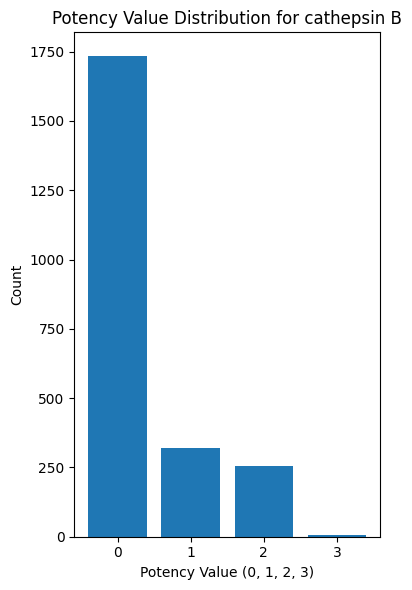

Input data contains NaNs. Imputing missing values...


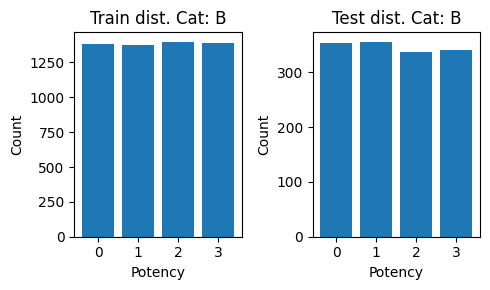

--------------------------------------------------
                  Cathepsin B
Linear Regression MSE: 0.24512067517849687
Linear Regression R²: 0.8041761599929147
Accuracy of the model (using rounded predictions) for B: 78.66%
 
Decision Tree MSE: 0.08720835542949983
Decision Tree R²: 0.9303303361559706
Decision Tree Accuracy (using rounded predictions) for B: 93.37%
 
Random Forest MSE: 0.04982521008515413
Random Forest R²: 0.9601952631660727
Random Forest Accuracy (using rounded predictions) for B: 94.81%
 
Gradient Boosting MSE: 0.10732230117313317
Gradient Boosting R²: 0.914261556603433
Gradient Boosting Accuracy (using rounded predictions) for B: 88.39%
 
kNN Regression MSE: 0.0736842105263158
kNN Regression R²: 0.9411346062805744
kNN Regression Accuracy (using rounded predictions) for B: 93.22%
 
SVR MSE: 0.11693413936566467
SVR R²: 0.9065827793521153
SVR Accuracy (using rounded predictions) for B: 87.31%
 
MLP Regression MSE: 0.04893771323189893
MLP Regression R²: 0.9609042732

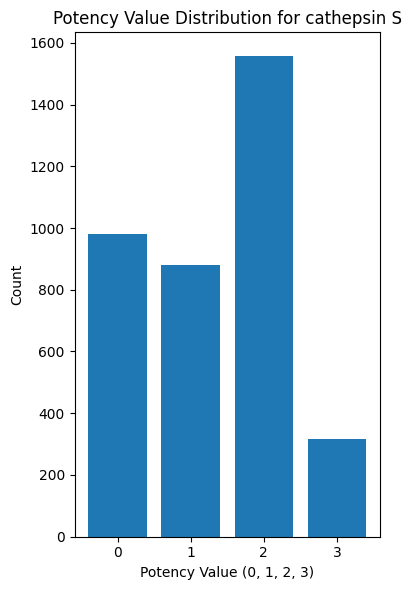

Input data contains NaNs. Imputing missing values...


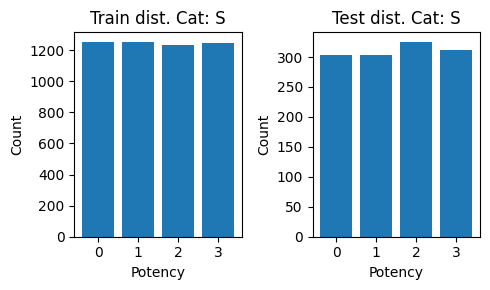

--------------------------------------------------
                  Cathepsin S
Linear Regression MSE: 0.39510094350200586
Linear Regression R²: 0.6811726432437388
Accuracy of the model (using rounded predictions) for S: 61.12%
 
Decision Tree MSE: 0.24630220883534137
Decision Tree R²: 0.8012460271287561
Decision Tree Accuracy (using rounded predictions) for S: 84.66%
 
Random Forest MSE: 0.17923879119787015
Random Forest R²: 0.855362962388081
Random Forest Accuracy (using rounded predictions) for S: 83.13%
 
Gradient Boosting MSE: 0.2704154153803432
Gradient Boosting R²: 0.7817878354131961
Gradient Boosting Accuracy (using rounded predictions) for S: 70.04%
 
kNN Regression MSE: 0.19216064257028112
kNN Regression R²: 0.8449356531517461
kNN Regression Accuracy (using rounded predictions) for S: 79.76%
 
SVR MSE: 0.281040799227882
SVR R²: 0.7732136644263979
SVR Accuracy (using rounded predictions) for S: 73.01%
 
MLP Regression MSE: 0.17489981808112912
MLP Regression R²: 0.858864303887

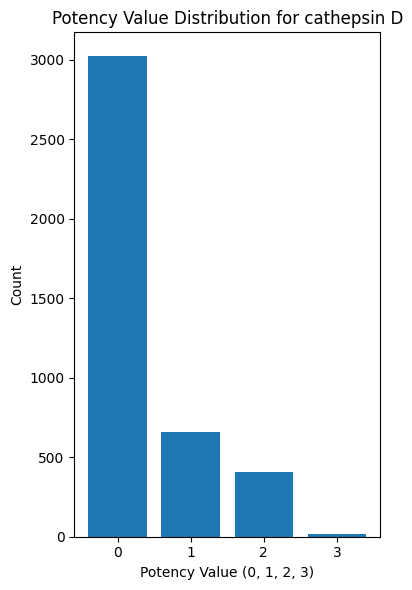

Input data contains NaNs. Imputing missing values...


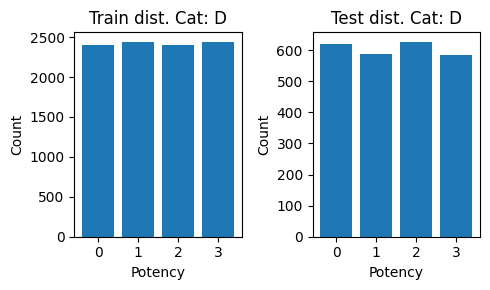

--------------------------------------------------
                  Cathepsin D
Linear Regression MSE: 0.3957192517692848
Linear Regression R²: 0.6824173935550607
Accuracy of the model (using rounded predictions) for D: 81.92%
 
Decision Tree MSE: 0.07903895843086922
Decision Tree R²: 0.9365676592257294
Decision Tree Accuracy (using rounded predictions) for D: 94.58%
 
Random Forest MSE: 0.04809552929193339
Random Forest R²: 0.9614011613471197
Random Forest Accuracy (using rounded predictions) for D: 95.70%
 
Gradient Boosting MSE: 0.10775620255157209
Gradient Boosting R²: 0.9135207713197407
Gradient Boosting Accuracy (using rounded predictions) for D: 88.50%
 
kNN Regression MSE: 0.0631692180388912
kNN Regression R²: 0.9493038440202649
kNN Regression Accuracy (using rounded predictions) for D: 94.54%
 
SVR MSE: 0.10782617057165084
SVR R²: 0.9134646188174678
SVR Accuracy (using rounded predictions) for D: 88.17%
 
MLP Regression MSE: 0.052130027025148885
MLP Regression R²: 0.958163294

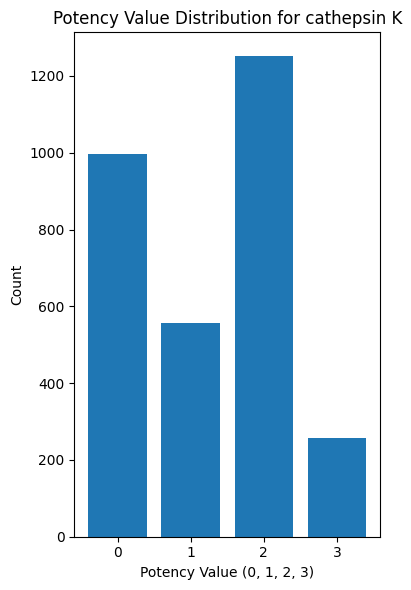

Input data contains NaNs. Imputing missing values...


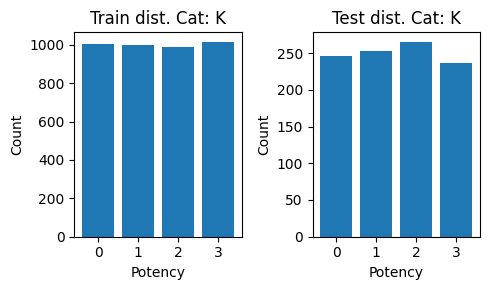

--------------------------------------------------
                  Cathepsin K
Linear Regression MSE: 0.4361448419858157
Linear Regression R²: 0.64102679638361
Accuracy of the model (using rounded predictions) for K: 61.44%
 
Decision Tree MSE: 0.1672819202020304
Decision Tree R²: 0.862317007972372
Decision Tree Accuracy (using rounded predictions) for K: 88.71%
 
Random Forest MSE: 0.13304168560634896
Random Forest R²: 0.8904987621103431
Random Forest Accuracy (using rounded predictions) for K: 87.01%
 
Gradient Boosting MSE: 0.281185575736265
Gradient Boosting R²: 0.768567509653023
Gradient Boosting Accuracy (using rounded predictions) for K: 70.23%
 
kNN Regression MSE: 0.21390609390609394
kNN Regression R²: 0.8239425337396604
kNN Regression Accuracy (using rounded predictions) for K: 79.42%
 
SVR MSE: 0.32672661201916436
SVR R²: 0.7310845220839202
SVR Accuracy (using rounded predictions) for K: 72.13%
 
MLP Regression MSE: 0.22719653535957382
MLP Regression R²: 0.8130037081781583

In [21]:
for cat in cathepsins:
    input_data = pd.read_csv(f'./Training_data/input_cathepsin_{cat}.csv', header=None, skiprows=1)  # Descriptors (features)
    output_data = pd.read_csv(f'./Training_data/output_cathepsin_{cat}.csv', header=None, skiprows=1)  # Potency values (0, 1, 2, 3)
    output_labels = output_data[0].values

    # Plotting the distribution of potency values
    plt.figure(figsize=(4, 6))
    plt.hist(output_labels, bins=np.arange(len(np.unique(output_labels)) + 1) - 0.5, rwidth=0.8)
    plt.title(f"Potency Value Distribution for cathepsin {cat}")
    plt.xlabel("Potency Value (0, 1, 2, 3)")
    plt.ylabel("Count")
    plt.xticks(range(len(np.unique(output_labels))))

    plt.tight_layout()
    plt.show()
    # Normalize the input data (descriptors)
    scaler = MinMaxScaler()
    input_data_normalized = scaler.fit_transform(input_data)

    # Check for NaNs in the input data
    if np.isnan(input_data_normalized).any():
        print("Input data contains NaNs. Imputing missing values...")

    # Impute missing values with the mean (or median)
    imputer = SimpleImputer(strategy='mean')  # Use 'median' if you prefer median imputation
    input_data_imputed = imputer.fit_transform(input_data_normalized)

    # Convert output data to a 1D array (labels)
    output_data_labels = output_data[0].values

    # One-hot encode the output potency values (0 -> [0, 0, 0, 1], 1 -> [0, 0, 1, 0], etc.)
    output_data_encoded = pd.get_dummies(output_data_labels, dtype=np.float32).values  # Convert to NumPy array

    # Reshape the input data to fit the 1D CNN
    input_data_reshaped = input_data_imputed.reshape((input_data_imputed.shape[0], input_data_imputed.shape[1], 1))

    # Apply SMOTE to balance the classes (input reshaped to 2D)
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(input_data_reshaped.reshape(input_data_reshaped.shape[0], -1), output_data_encoded)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
    # Convert one-hot encoded arrays to indices (for easier plotting)
    train_labels = np.argmax(y_train, axis=1)
    test_labels = np.argmax(y_test, axis=1)

    # Plotting the distribution of labels
    plt.figure(figsize=(5, 3))

    # Plotting for y_train
    plt.subplot(1, 2, 1)
    plt.hist(train_labels, bins=np.arange(len(np.unique(train_labels)) + 1) - 0.5, rwidth=0.8)
    plt.title(f"Train dist. Cat: {cat}")
    plt.xlabel("Potency")
    plt.ylabel("Count")
    plt.xticks(range(len(np.unique(train_labels))))

    # Plotting for y_test
    plt.subplot(1, 2, 2)
    plt.hist(test_labels, bins=np.arange(len( np.unique(test_labels)) + 1) - 0.5, rwidth=0.8)
    plt.title(f"Test dist. Cat: {cat}")
    plt.xlabel("Potency")
    plt.ylabel("Count")
    plt.xticks(range(len(np.unique(test_labels))))

    plt.tight_layout()
    plt.show()
    print("-" * 50)
    print(f"                  Cathepsin {cat}")
    LRFunction(X_train, y_train, X_test, y_test, cat)
    print(" ")
    DecisionFunction(X_train, y_train, X_test, y_test, cat)
    print(" ")
    RandomForestFunction(X_train, y_train, X_test, y_test, cat)
    print(" ")
    GradientBoostingFunction(X_train, y_train, X_test, y_test, cat)
    print(" ")
    KNNFunction(X_train, y_train, X_test, y_test, cat)
    print(" ")
    SVRFunction(X_train, y_train, X_test, y_test, cat)
    print(" ")
    MLPFunction(X_train, y_train, X_test, y_test, cat)
    print(" ")
    print("-" * 50)



